#### 스케일링 실습

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('axes',unicode_minus=False)

In [3]:
from patsy import demo_data #임의의 실수형 데이터
df = pd.DataFrame(demo_data('x1','x2','x3','x4','x5'))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [11]:
X = np.arange(7).reshape(-1,1)
# arange(n) n개 크기의 ndarray 1차원 배열생성 
# reshape 1차원 배열의 차원 변경
    # reshape(n,m) n*m의 2차원 배열 
    # reshape(n,m,k) n*m*k의 3차원 배열
    # 파라미터에 -1 값이 들어갈 경우, 해당 행/열 등은 데이터 개수에 알맞게 범위가 나뉘어 진다.
    # 현재 -1, 1 이므로 row는 데이터 개수가 존재하는 만큼(7개), column은 1개로 데이터 구조를 반환한다.

X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [12]:
from sklearn.preprocessing import StandardScaler
# 평균 0, 표준편차 1이 되도록 스케일링
# 정규화

scaler = StandardScaler()
X2 = scaler.fit_transform(X)
X2

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [13]:
# 이상치 생성
X3 = np.vstack([X,[[1000]]]) #배열을 세로로 쌓는 함수
X3

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [14]:
X3 = scaler.fit_transform(X3)
X3

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

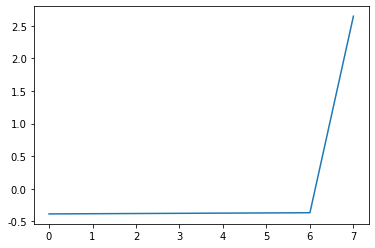

In [15]:
plt.plot(X3)
plt.show()

In [16]:
# 이상치 존재시 스케일링 후 평균값이 어그러질 수 있다.
# 기계학습 모형의 예측력을 떨어뜨릴 수 있는 요인
from sklearn.preprocessing import RobustScaler

scaler2 = RobustScaler()
X4 = scaler2.fit_transform(X3)
X4

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

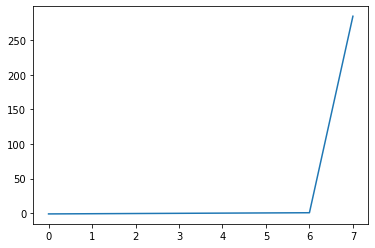

In [17]:
plt.plot(X4)
plt.show()
#아웃라이어가 있어도 대부분 데이터가 0주위 즉, 중앙값 주변으로 모이게 된다.